## Import Libraries

In [77]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

%matplotlib inline

## Load the Data

In [4]:
df = pd.read_csv("L_player.csv")

In [6]:
df.shape

(5912, 19)

In [12]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,Manchester United,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000


In [10]:
df.drop(columns='Unnamed: 0' , inplace = True)

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [14]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value


In [16]:
# Completeness
df.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

In [18]:
# Accurecy types
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
dtype: object

In [20]:
c_col = [col for col in df.columns if df[col].dtype == "object"]
n_col = [col for col in df.columns if df[col].dtype != "object"]

In [22]:
for i in c_col:
    print(df[i].value_counts())

team
Jeonbuk Hyundai Motors    46
Daejeon Hana Citizen      45
FC Seoul                  44
Gangwon FC                43
Sagan Tosu                40
                          ..
AZ Alkmaar                 3
FK Krasnodar               2
ACF Fiorentina             2
Sevilla FC                 2
CA Osasuna                 1
Name: count, Length: 371, dtype: int64
position
Defender Centre-Back          866
Goalkeeper                    787
Attack Centre-Forward         769
midfield-CentralMidfield      568
midfield-DefensiveMidfield    468
midfield-AttackingMidfield    448
Defender Right-Back           435
Attack-LeftWinger             428
Defender Left-Back            408
Attack-RightWinger            406
midfield                       74
midfield-LeftMidfield          67
midfield-RightMidfield         64
Attack                         52
Attack-SecondStriker           40
Defender                       32
Name: count, dtype: int64


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [24]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,Manchester United,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000


In [26]:
c_col = ['team']

In [28]:
# one hot coding
df = pd.get_dummies(df, columns=c_col)

In [30]:
df.shape

(5912, 388)

In [32]:
encoder = LabelEncoder()
df['position'] = encoder.fit_transform(df['position'])  

#### 3. Feature selection

In [16]:
# sns.heatmap(df.corr(), annot=True);

In [34]:
correlation = df.corr()
correlation['position'].sort_values(ascending=False)

position               1.000000
goals conceded         0.133491
team_Nagoya Grampus    0.029660
team_Damac FC          0.028727
team_Crystal Palace    0.025743
                         ...   
highest_value         -0.036664
height                -0.056728
assists               -0.094967
appearance            -0.110861
goals                 -0.247667
Name: position, Length: 388, dtype: float64

In [36]:
# Set the correlation threshold
threshold = 0.1  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['position']) > threshold]['position'].index
selected_features

Index(['position', 'appearance', 'goals', 'goals conceded'], dtype='object')

#### 4. Prepare train and test data

In [38]:
# Prepare data
X = df.drop(['position'], axis=1)
y = df['position']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X.shape

(5912, 387)

## Buliding the Model

In [42]:
model = LogisticRegression()

## Train the Model

In [44]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Test the Model

In [46]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [48]:
model.coef_

array([[-6.28270694e-01, -1.39478073e+00, -5.84538852e-01, ...,
        -1.29507259e-01,  2.31507909e-02,  8.09146220e-03],
       [ 1.03328346e+00,  2.46542716e-01,  2.31804354e+00, ...,
         1.07848913e-01, -3.46850042e-01, -1.09476456e-01],
       [-9.82295748e-01, -1.09177141e-03,  1.80812782e+00, ...,
        -7.24245217e-02,  9.27953792e-02, -5.72005084e-02],
       ...,
       [ 4.93612248e-02,  2.00303136e-01,  4.56668233e-01, ...,
         2.77138486e-02, -1.01517027e-01, -6.63728967e-02],
       [-6.99742790e-01,  1.80510587e-01,  8.19011279e-01, ...,
         2.55446511e-01, -1.59575854e-02, -1.22748498e-02],
       [-6.49430024e-01,  5.00496209e-01,  3.81888269e-01, ...,
         1.88099672e-01, -9.67847218e-03, -1.20085841e-02]])

In [50]:
print(model.intercept_) 

[-4.55276574  3.38885115  1.95446279  1.94303136 -2.4992476  -4.02241106
  2.11681606  2.38070717  2.30751878 -3.45241739 -4.14540785  2.282599
  3.05180284  2.57064019 -1.66888904 -1.65529067]


## Evaluating the Model 

In [52]:
# our benchmark model
base_model = round(df['position'].value_counts()[1]/df.shape[0]*100, 2)
base_model

13.01

1. Accuracy

In [54]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

33.8123415046492

In [56]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy*100

54.38781983506027

2. Precision

In [58]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.19


3. Recall

In [60]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.20


4. F1 Score

In [62]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.19


#### Predictions vs. Real Values

In [64]:
predictions = model.predict(X_test_scaled)

In [66]:
Real_Values = np.array(y_test)
#Real_Values

#### Residual Histogram

In [68]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[  2,   0,   1,   1,   0,   1,   0,   0,   0,   1,   3,   2,   0,
          1,   0,   0],
       [  0,  73,  11,   8,   0,   0,  23,   4,   2,   1,   0,  17,  12,
          4,   0,   1],
       [  0,   8,  16,  16,   0,   0,   4,   2,   3,   0,   2,  18,  10,
          1,   0,   2],
       [  0,  16,  12,   6,   0,   0,   4,   3,   2,   0,   2,  23,   8,
          9,   1,   1],
       [  0,   3,   1,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   1],
       [  2,   0,   0,   0,   0,   0,   0,   0,   1,   1,   4,   1,   0,
          2,   0,   0],
       [  1,  10,   0,   0,   1,   0, 102,  12,   5,   4,   1,   2,   3,
          9,   0,   0],
       [  1,   4,   2,   5,   0,   0,  15,   9,  10,   0,   1,   3,   8,
         11,   1,   0],
       [  1,   6,   6,   6,   0,   0,  12,  14,   2,   0,   0,   9,  24,
         16,   1,   0],
       [  0,   1,   0,   0,   0,   0,  17,   1,   4, 137,   1,   0,   1,
          3,   0,   0],
       [  1,   0,   0,   0,   

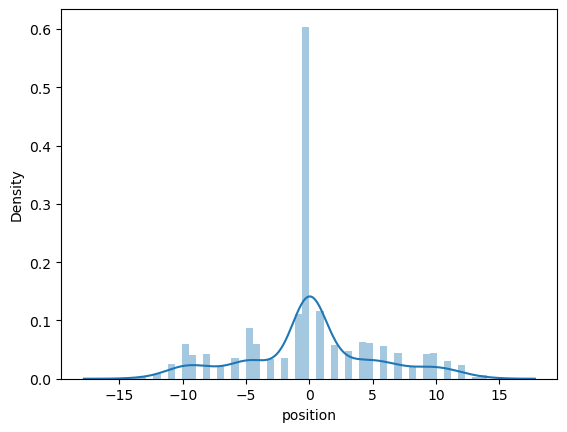

In [70]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

## Decision Tree


### Building the Model


In [79]:
model1 = RandomForestClassifier()
model2 = DecisionTreeClassifier()

### Train the Model

In [82]:
model1.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [84]:
model2.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

### Test the Model

In [87]:
y_pred = model1.predict(X_test_scaled)

In [89]:
y_pred = model2.predict(X_test_scaled)

### Evaluating thte Model

In [92]:
base_model = round(df['position'].value_counts()[1]/df.shape[0]*100, 2)
base_model

13.01

In [94]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

35.587489433643285

In [96]:
#Accuracy
y_pred_train = model1.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy*100

99.87312328187777

In [98]:
#Accuracy
y_pred_train = model2.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy*100

99.87312328187777

In [100]:
#Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.20


In [102]:
#Precision
y_pred_train = model1.predict(X_train_scaled)
precision = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 1.00


In [104]:
#Precision
y_pred_train = model2.predict(X_train_scaled)
precision = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 1.00


In [106]:
#Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.21


In [108]:
#Recall
y_pred_train = model1.predict(X_train_scaled)
recall = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 1.00


In [110]:
#Recall
y_pred_train = model2.predict(X_train_scaled)
recall = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 1.00


In [112]:
#F1
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.20


In [114]:
#F1
y_pred_train = model1.predict(X_train_scaled)
f1 = f1_score(y_train,y_pred_train,average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 1.00


In [116]:
#F1
y_pred_train = model2.predict(X_train_scaled)
f1 = f1_score(y_train,y_pred_train,average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 1.00
